## Aula 7 - Correlação e Regressão Linear

### Correlação com Pandas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [30]:
sns.set() # Ajusta valor padrão de tema, escala e paleta de cor
# Considere dataset de gorgetas a seguir
tips = sns.load_dataset("tips") 
# Mostre as primeiras linhas do dataframe tips
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [38]:
# Calcule a correlação entre as variáveis do dataset tips
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<AxesSubplot:>

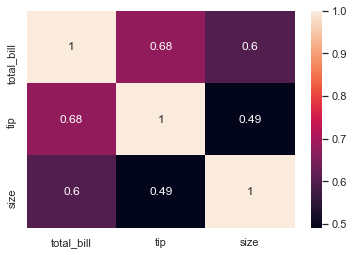

In [4]:
# Plote um mapa de calor (heatmap) da tabela de correlação das variáveis do dataset tips. 
# Use o argumento annot=True
sns.heatmap(tips.corr(), annot=True)

<AxesSubplot:>

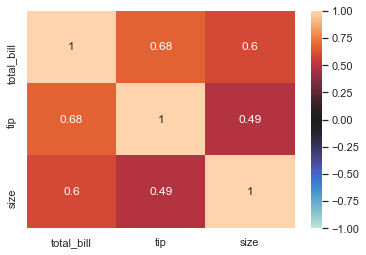

In [5]:
# Trace um novo heatmap ajustando os valores do intervalo máximo, mínimo e o centro da escala de cores
# vmin=-1, vmax=1, center=0
sns.heatmap(tips.corr(), annot = True, vmin=-1, vmax=1, center=0)

<AxesSubplot:>

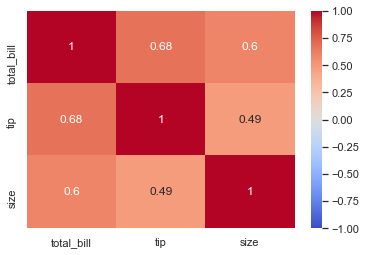

In [6]:
# Ajuste o color map para coolwarm usando o argumento cmpa='coolwarm'
sns.heatmap(tips.corr(), annot = True, vmin=-1, vmax=1, center=0, cmap='coolwarm')

### Regressão Linear com Statsmodel

In [3]:
import statsmodels.api as sm
import numpy as np
import pandas as pd

In [4]:
from sklearn import datasets ## imports datasets from scikit-learn
data = datasets.load_boston()

In [5]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
# Define o dataframe que vai conter as variaveis independentes
df = pd.DataFrame(data.data, columns=data.feature_names)

# Define o dataframe que vai conter a variavel dependente
target = pd.DataFrame(data.target, columns=["MEDV"])

In [9]:
# Una os dois dataframes acima num dataframe chamado df_join
df_join = df.join(target)

In [48]:
df_join.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


NameError: name 'df_join' is not defined

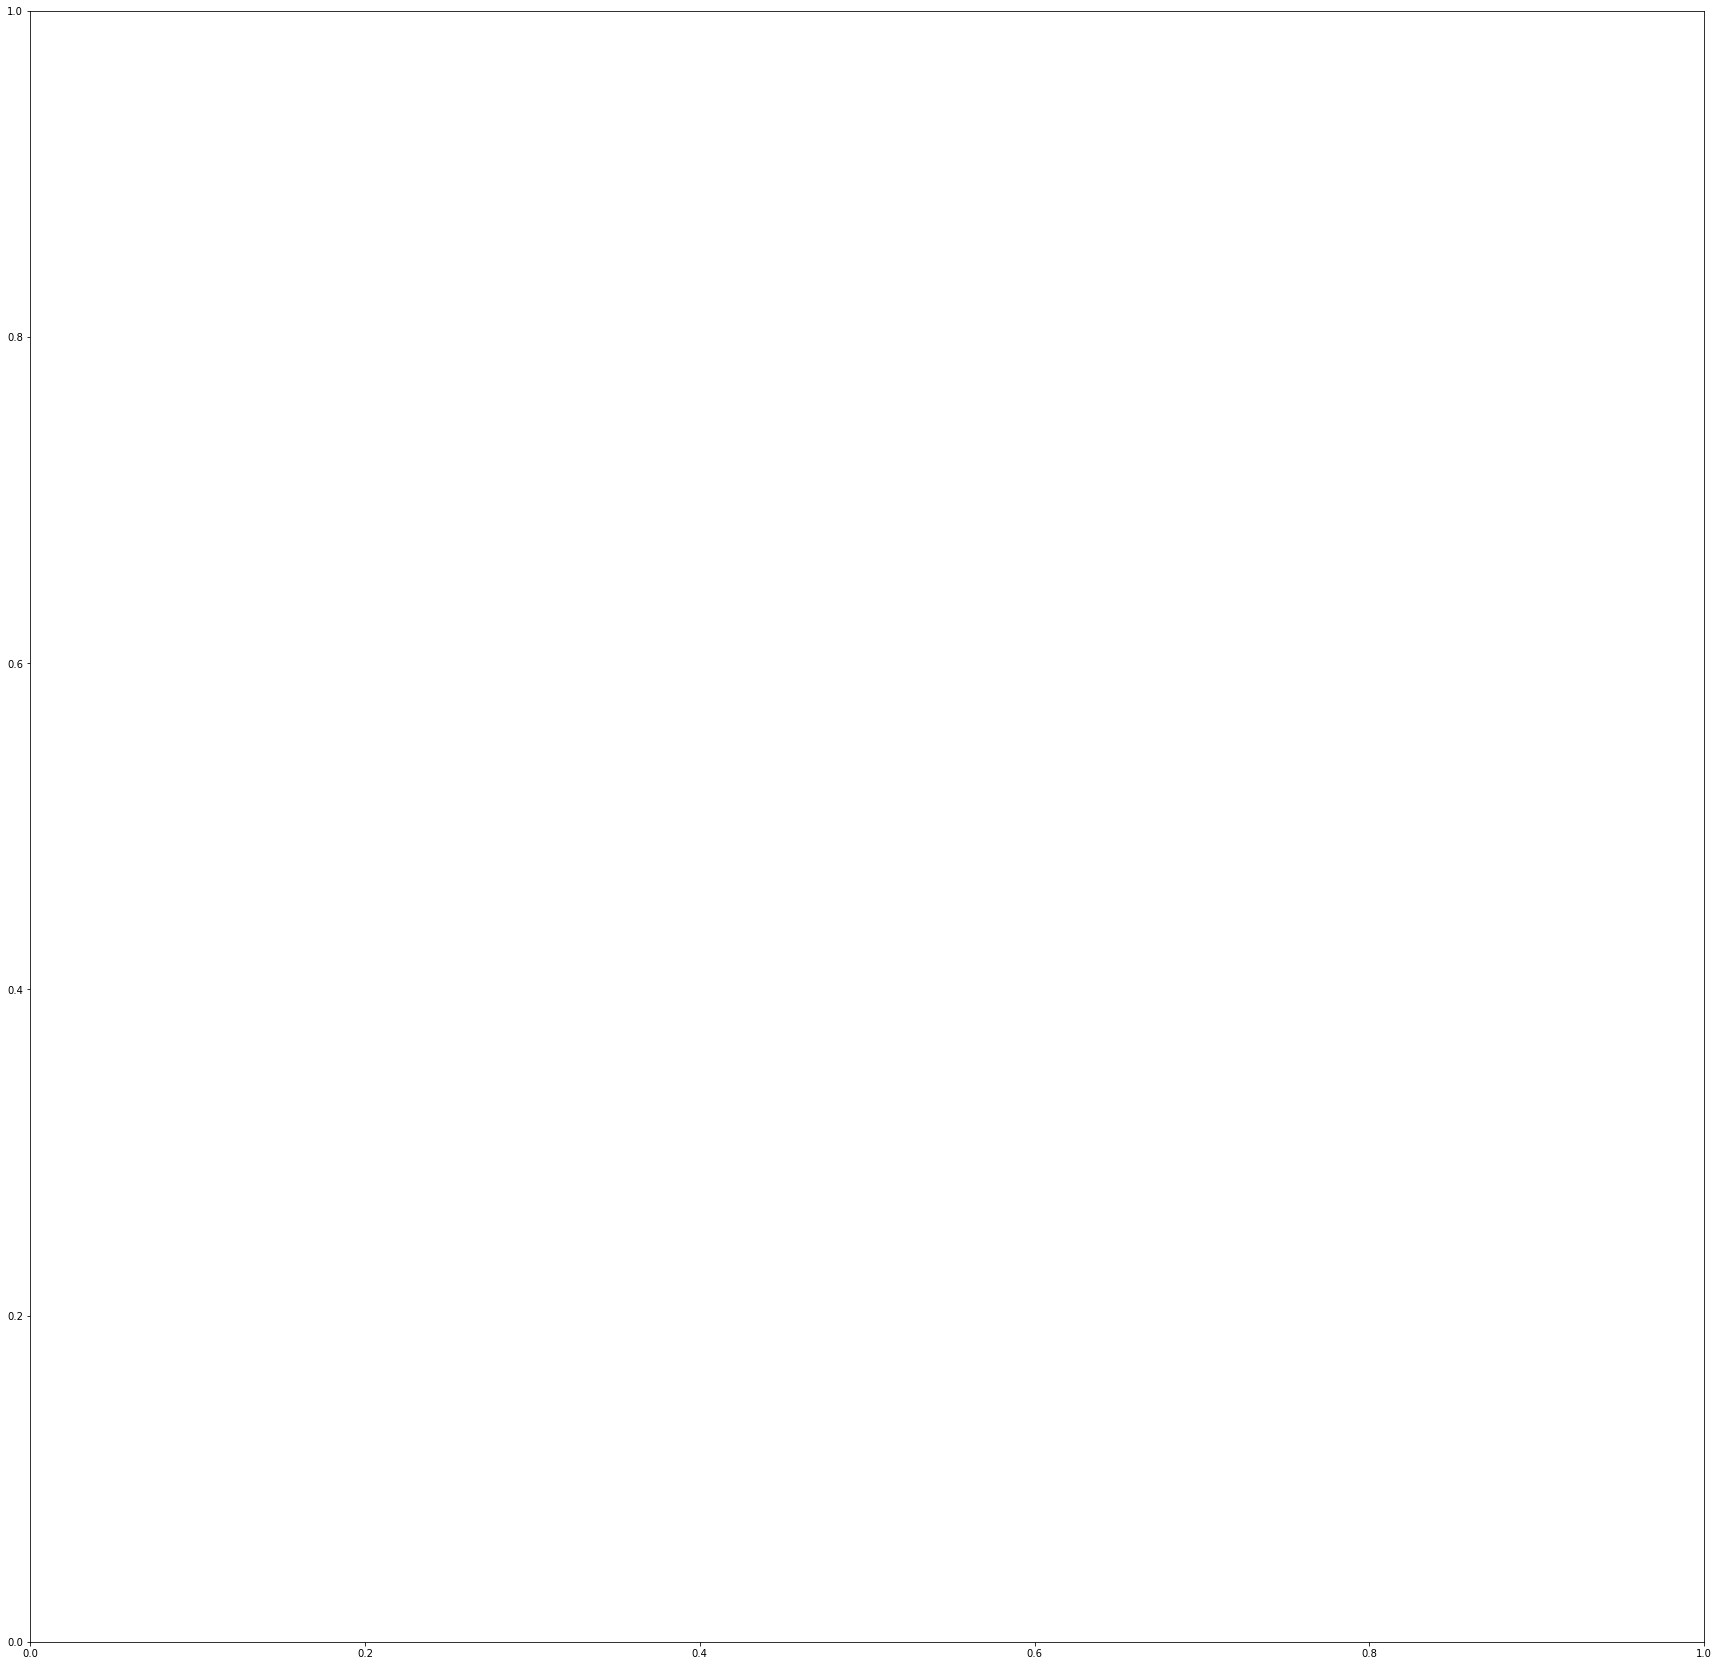

In [8]:
# Plote um heatmap da correlação das variaveis do dataframe df_join
# Defina um tamanho de figura (30x30) com o comaando a seguir: fig, axc = plt.subplots(figsize=(30,30)) 
# Plote o heatmap especificando o eixo ax=axc (passando o exio criado com o comando da linha anterior)
fig, axc = plt.subplots(figsize=(30,30)) 
sns.heatmap(data=df_join.corr(), annot=True, cmap='coolwarm', ax=axc)

In [14]:
# Duas variáveis interessantes são: RM e LSTAT. Olhe a ultima linha ou ultima coluna do gráfico para ver
# a relação das variáveis independentes com a variável dependente MEDV

In [51]:
import statsmodels.api as sm

# Carrege a coluna RM na variavel X
X = df["RM"]
# Carrege a coluna RM MEDV variavel X
y = target["MEDV"]
## adicione o valor de interceptação do eixo y, o b da equação y = ax + b
X = sm.add_constant(X) 

# Primeiro a variável dependente, depois a variável indepedente.
# O metodo OLS da biblioteca statsmodel não adiciona a constante b da equação y = ax + b
# Você precisa explicitamente montar esta equação.
# Vamos fazer a regressão inicialmente sem a constante
model = sm.OLS(y, X).fit()

# Mostra o resumo das estatisticas
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Wed, 26 Aug 2020   Prob (F-statistic):           2.49e-74
Time:                        11:23:12   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
# Repita o procedimento acima passando duas variaveis independentes ao modelo RM e LSTAT
X = df_join[['RM', 'LSTAT']]
y = df_join['MEDV']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
# predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     444.3
Date:                Wed, 26 Aug 2020   Prob (F-statistic):          7.01e-112
Time:                        11:38:06   Log-Likelihood:                -1582.8
No. Observations:                 506   AIC:                             3172.
Df Residuals:                     503   BIC:                             3184.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3583      3.173     -0.428      0.669      -7.592       4.875
RM             5.0948      0.444     11.463      0.000       4.222       5.968
LSTAT         -0.6424      0.044    -14.689      0.000      -0.728      -0.556
==============================================================================
Omnibus:                      145.712   Durbin-Watson:                   0.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              457.690
Skew:                           1.343   Prob(JB):                    4.11e-100
Kurtosis:                       6.807   Cond. No.                         202.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
# Calcule as predições guardando o resultado na variavel predictions
predictions = model.predict(X)

In [20]:
# Imprima as 5 primeiras predições
predictions[:5]


0    28.941014
1    25.484206
2    32.659075
3    32.406520
4    31.630407
dtype: float64

### Regressão linear com Scikit-learn

In [18]:
from sklearn import linear_model
# Carrega o dataset na variavel dfsk
dfsk = pd.DataFrame(data.data, columns=data.feature_names)

# Defina as variaveis independentes na variavel Xsk
Xsk = dfsk[['RM', 'LSTAT']]

# Defina a variavel dependente na variavel ysk
target = pd.DataFrame(data.target, columns=["MEDV"])
ysk = target['MEDV']

#Crie o modelo da regressão linear
lm = linear_model.LinearRegression()
model = lm.fit(Xsk,ysk)

# Realize as predições
predictions_sk = lm.predict(Xsk)

In [19]:
# Imprima as 5 primeiras predições e compare com as predições do Statsmodel
print(predictions_sk[0:5])
# Confere com a predição do statsmodel até a 5a casa decimal

[28.94101368 25.48420566 32.65907477 32.40652    31.63040699]


### Visualizando a regressão com o Seaborn

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

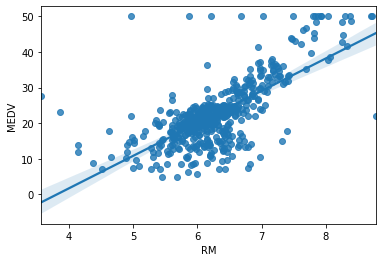

In [21]:
# Plote um scatterplot juntamente com uma reta de regressão e seu intervalo de confiança de 95%
sns.regplot(x="RM", y='MEDV', data=df_join)

### Tratamento de Exceções em Python

In [22]:
2/2

1.0

In [23]:

a = 0 / 0
print("Passou aqui")

ZeroDivisionError: division by zero

In [26]:
for i in range(0, 5):
    try:
        a = 1000/i
        print("resultado: {0}".format(i))
    except ZeroDivisionError as e:
        print(e)
        print("deu erro. i={0}".format(i))
        pass
    except Exeption as e2:
        print("faz outra coisa")
        pass



division by zero
deu erro. i=0
resultado: 1
resultado: 2
resultado: 3
resultado: 4
